In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [2]:
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 500

# Summary of the data

Data is from [Inside AirBNB](http://insideairbnb.com/get-the-data.html). There are five files provided (filenames changed to avoid redundancy). A data dictionary is [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896).

TODO talk about them using reviews as occupancy proxy.


- listings_summary.csv (was listings.csv)
    - condensed listings file
- listings.csv (was listings.csv.gz)
    - full listings data
- reviews_summary.csv (was reviews.csv)
    - dates of when reviews were.
- reviews.csv (was reviews.csv.gz)
    - full reviews data
- calendar.csv
    - availability calendar
    
Inspecting the data dict and the files, I decided to use only the listings summary and pull selected features from the full listings csv, as the reviews and calendar are partially captured and summarized in the listings csv anyways.

In [132]:
listings_summary = pd.read_csv('data/listings_summary.csv')
listings = pd.read_csv('data/listings.csv')
reviews_summary = pd.read_csv('data/reviews_summary.csv')
reviews = pd.read_csv('data/reviews.csv')
calendar = pd.read_csv('data/calendar.csv')

In [4]:
listings_summary.head()

id                                               name  host_id  \
0  10080                     D1 -  Million Dollar View 2 BR    30899   
1  13358  Monthly (or Longer ) Designer One Bedroom Down...    52116   
2  13490                       Vancouver's best kept secret    52467   
3  14267                                  EcoLoft Vancouver    56030   
4  16254        Close to PNE/Hastings Park and East Village    63238   

        host_name  neighbourhood_group             neighbourhood  latitude  \
0            Rami                  NaN                  Downtown  49.28872   
1            Lynn                  NaN                  West End  49.28201   
2            Iris                  NaN  Kensington-Cedar Cottage  49.25622   
3  Peter & Alison                  NaN  Kensington-Cedar Cottage  49.24922   
4           Jason                  NaN          Hastings-Sunrise  49.27721   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -123.12046  Entire home/apt    150              90                 16   
1 -123.12669  Entire home/apt     85              30                430   
2 -123.06607  Entire home/apt    145              30                 88   
3 -123.08139  Entire home/apt    140               3                 33   
4 -123.04086  Entire home/apt    195               3                  5   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2017-02-26               0.14                              40   
1  2021-01-01               3.27                               1   
2  2020-10-31               0.73                               1   
3  2020-02-07               0.26                               1   
4  2019-08-19               0.15                               1   

   availability_365  
0               346  
1                98  
2               203  
3               123  
4               289

In [19]:
listings.head()

id                         listing_url       scrape_id last_scraped  \
0  10080  https://www.airbnb.com/rooms/10080  20210412154228   2021-04-13   
1  13358  https://www.airbnb.com/rooms/13358  20210412154228   2021-04-13   
2  13490  https://www.airbnb.com/rooms/13490  20210412154228   2021-04-13   
3  14267  https://www.airbnb.com/rooms/14267  20210412154228   2021-04-13   
4  16254  https://www.airbnb.com/rooms/16254  20210412154228   2021-04-12   

                                                name  \
0                     D1 -  Million Dollar View 2 BR   
1  Monthly (or Longer ) Designer One Bedroom Down...   
2                       Vancouver's best kept secret   
3                                  EcoLoft Vancouver   
4        Close to PNE/Hastings Park and East Village   

                                         description  \
0  Stunning two bedroom, two bathroom apartment. ...   
1  <b>The space</b><br />This suites central loca...   
2  This apartment rents for one month blocks of t...   
3  The Ecoloft is located in the lovely, family r...   
4  2 Bedroom garden level guest suite.(lower leve...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  In the heart of Vancouver, this apartment has ...   
3  We live in the centre of the city of Vancouver...   
4  Good Eats, Cute Shops and all the personality ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/55778229/c2f7...    30899   
1  https://a0.muscache.com/pictures/c23bb7ef-e300...    52116   
2  https://a0.muscache.com/pictures/73394727/79d5...    52467   
3  https://a0.muscache.com/pictures/3646de9b-934e...    56030   
4  https://a0.muscache.com/pictures/90623667/583c...    63238   

                                  host_url       host_name  host_since  \
0  https://www.airbnb.com/users/show/30899            Rami  2009-08-10   
1  https://www.airbnb.com/users/show/52116            Lynn  2009-11-07   
2  https://www.airbnb.com/users/show/52467            Iris  2009-11-08   
3  https://www.airbnb.com/users/show/56030  Peter & Alison  2009-11-20   
4  https://www.airbnb.com/users/show/63238           Jason  2009-12-15   

                         host_location  \
0  Vancouver, British Columbia, Canada   
1  Vancouver, British Columbia, Canada   
2  Vancouver, British Columbia, Canada   
3  Vancouver, British Columbia, Canada   
4  Vancouver, British Columbia, Canada   

                                          host_about  host_response_time  \
0                       I will be happy to host you.      within an hour   
1  I am from Vancouver and in my free time enjoy ...        within a day   
2  Hello! My husband Fred and I are actors living...      within an hour   
3  We moved into this central Vancouver location ...  within a few hours   
4                                                NaN                 NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                93%                  87%                 f   
1               100%                  57%                 t   
2               100%                  78%                 t   
3               100%                  NaN                 f   
4                NaN                  NaN                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/55302...   
1  https://a0.muscache.com/defaults/user_pic-50x5...   
2  https://a0.muscache.com/im/users/52467/profile...   
3  https://a0.muscache.com/im/pictures/user/ab0a8...   
4  https://a0.muscache.com/im/pictures/user/f00ba...   

                                    host_picture_url  \
0  https://a0.muscache.com/im/pictures/user/55302...   
1  https://a0.muscache.com/defaults/user_pic-225x...   
2  https://a0.muscache.com/im/users/52467/profile...   
3  https://a0.muscache.com/im/pictures/user/ab

In [5]:
reviews_summary.head()

listing_id        date
0       10080  2011-11-15
1       10080  2011-12-14
2       10080  2012-03-12
3       10080  2012-06-05
4       10080  2013-01-15

In [6]:
reviews.head()

listing_id       id        date  reviewer_id reviewer_name  \
0       10080   720466  2011-11-15       143771       Anthony   
1       10080   786114  2011-12-14      1472653        Nilesh   
2       10080   989885  2012-03-12      1433564         Avril   
3       10080  1419559  2012-06-05       725806        Dennis   
4       10080  3354964  2013-01-15      3641867          Jude   

                                            comments  
0  this accommodation was excellent. beautiful sp...  
1  The host canceled my reservation 13 days befor...  
2  This apartment is fantastic, just what I and m...  
3  Very nice apartment and great view. Close to S...  
4  Both Rami and Mauricio made our family of 5 fe...

In [7]:
calendar.head()

listing_id        date available   price adjusted_price  minimum_nights  \
0       35304  2021-04-14         f  $75.00         $75.00             2.0   
1       35304  2021-04-15         t  $75.00         $75.00             2.0   
2       35304  2021-04-16         t  $75.00         $75.00             2.0   
3       35304  2021-04-17         t  $75.00         $75.00             2.0   
4       35304  2021-04-18         t  $75.00         $75.00             2.0   

   maximum_nights  
0            30.0  
1            30.0  
2            30.0  
3            30.0  
4            30.0

# Wrangling

## Listings Summary
This is what `listings_summary` looks like:

In [133]:
listings_summary.head()

id                                               name  host_id  \
0  10080                     D1 -  Million Dollar View 2 BR    30899   
1  13358  Monthly (or Longer ) Designer One Bedroom Down...    52116   
2  13490                       Vancouver's best kept secret    52467   
3  14267                                  EcoLoft Vancouver    56030   
4  16254        Close to PNE/Hastings Park and East Village    63238   

        host_name  neighbourhood_group             neighbourhood  latitude  \
0            Rami                  NaN                  Downtown  49.28872   
1            Lynn                  NaN                  West End  49.28201   
2            Iris                  NaN  Kensington-Cedar Cottage  49.25622   
3  Peter & Alison                  NaN  Kensington-Cedar Cottage  49.24922   
4           Jason                  NaN          Hastings-Sunrise  49.27721   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -123.12046  Entire home/apt    150              90                 16   
1 -123.12669  Entire home/apt     85              30                430   
2 -123.06607  Entire home/apt    145              30                 88   
3 -123.08139  Entire home/apt    140               3                 33   
4 -123.04086  Entire home/apt    195               3                  5   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2017-02-26               0.14                              40   
1  2021-01-01               3.27                               1   
2  2020-10-31               0.73                               1   
3  2020-02-07               0.26                               1   
4  2019-08-19               0.15                               1   

   availability_365  
0               346  
1                98  
2               203  
3               123  
4               289

In [134]:
listings_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4299 non-null   int64  
 1   name                            4299 non-null   object 
 2   host_id                         4299 non-null   int64  
 3   host_name                       4170 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   4299 non-null   object 
 6   latitude                        4299 non-null   float64
 7   longitude                       4299 non-null   float64
 8   room_type                       4299 non-null   object 
 9   price                           4299 non-null   int64  
 10  minimum_nights                  4299 non-null   int64  
 11  number_of_reviews               4299 non-null   int64  
 12  last_review                     34

`neighbourhood_group` is all NaN, so will be dropped.

I'm going to drop the `name` of the listing as well. Although there might be some correlation between the marketing value in a title, I don't plan on doing any text analysis.

`host_name` also will be dropped, as `host_id` will suffice for tracking hosts.



In [136]:
listings_summary = listings_summary.drop(labels=['neighbourhood_group', 'name', 'host_name'], axis=1)

## Listings

I'm going to grab only useful looking features of out this data.

In [137]:
listings.head(1)

id                         listing_url       scrape_id last_scraped  \
0  10080  https://www.airbnb.com/rooms/10080  20210412154228   2021-04-13   

                             name  \
0  D1 -  Million Dollar View 2 BR   

                                         description neighborhood_overview  \
0  Stunning two bedroom, two bathroom apartment. ...                   NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/55778229/c2f7...    30899   

                                  host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/30899      Rami  2009-08-10   

                         host_location                    host_about  \
0  Vancouver, British Columbia, Canada  I will be happy to host you.   

  host_response_time host_response_rate host_acceptance_rate  \
0     within an hour                93%                  87%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/pictures/user/55302...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/55302...       Coal Harbour   

   host_listings_count  host_total_listings_count  \
0                 49.0                       49.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   

  host_identity_verified neighbourhood neighbourhood_cleansed  \
0                      t           NaN               Downtown   

   neighbourhood_group_cleansed  latitude  longitude       property_type  \
0                           NaN  49.28872 -123.12046  Entire condominium   

         room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
0  Entire home/apt             5        NaN        2 baths       2.0   2.0   

                                           amenities    price  minimum_nights  \
0  ["Iron", "Dryer", "Bed linens", "Cooking basic...  $150.00              90   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            1124                      90                      90   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                    1124                    1124                    90.0   

   maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  \
0                  1124.0               NaN                t               11   

   availability_60  availability_90  availability_365 calendar_last_scraped  \
0               41               71               346            2021-04-13   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                 16                      0                       0   

  first_review last_review  review_scores_rating  review_scores_accuracy  \
0   2011-11-15  2017-02-26                  93.0                     9.0   

   review_scores_cleanliness  review_scores_checkin  \
0                        9.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                          9.0                    10.0                  9.0   

     license instant_bookable  calculated_host_listings_count  \
0  18-476608                f                              40   

   calculated_host_listings_count_entire_homes  \
0                                           40   

   calculated_host_listings_count_private_rooms  \
0                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.14

In [138]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4299 non-null   int64  
 1   listing_url                                   4299 non-null   object 
 2   scrape_id                                     4299 non-null   int64  
 3   last_scraped                                  4299 non-null   object 
 4   name                                          4299 non-null   object 
 5   description                                   4272 non-null   object 
 6   neighborhood_overview                         3074 non-null   object 
 7   picture_url                                   4299 non-null   object 
 8   host_id                                       4299 non-null   int64  
 9   host_url                                      4299 non-null   o

After a cursory inspection, a number of features related to the host, the properties of the room, and the reviews seem interesting.

In [139]:
interesting_props_dict = {'host': ['host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
              'host_has_profile_pic', 'host_identity_verified'],
                          
                          'room': ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
               'amenities', 'instant_bookable'],
                          
                          'review': ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
               'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location', 'review_scores_value']
                         }
                          

# DATA CLEANING
I'll now look through the datasets we have and clean them as necessary, i.e. checking for duplicates, dealing with NaN's, and adjusting datatypes.

For clarity, I'll break the cleaning into four parts for each of `listings_summary`, `listings_host`, `listings_room`, `listings_review`, before combining them back together again.

In [163]:
# Features related to the host from listings.csv
listings_host = listings[interesting_props_dict['host']]
# Features related to the room from listings.csv
listings_room = listings[interesting_props_dict['room']]
# Features related to reviews from listings.csv
listings_review = listings[interesting_props_dict['review']]

## Helper functions for data cleaning
First, define a some helper functions for converting data types:

In [148]:
def convert_percent_to_float(string_percent):
    """
    Converts percentage strings to a float ratio e.g. 95% -> 0.95.
    
    For applying to dataframe elements. If element is NaN, returns back the element.
    """
    if pd.isna(string_percent):
        return string_percent
    else:
        return float(string_percent.strip('%'))/100

In [149]:
def convert_tf_to_float(string):
    """
    Converts strings of "t" and "f" to 1.0 or 0.0 floats.
    
    For applying to dataframe elements. If element is NaN, returns back the element.
    """ 
    if pd.isna(string):
        return string
    else:    
        return {'t':1, 'f':0}[string]

In [152]:
def convert_str_to_datetime(string, format='%Y-%m-%d'):
    """
    Converts strings of YYYY-MM-DD format (by default) to datetime objects.
    
    For applying to dataframe elements. If element is NaN, returns back the element.
    
    Uses pd.to_datetime.
    """ 
    return pd.to_datetime(string, format=format)
    

In [161]:
def col_apply_inplace(df, cols, f, **kwds):
    """
    Helper func to apply a func to elements of a column in-place.
    
    df   : input dataframe
    cols : single string or list of strings of column names
    f    : the function to apply to the elements of the columns
    kwds : keyword arguments to pass onto f
    """
    if type(cols) == str:
        df.loc[:,cols] = df[cols].apply(f, **kwds)
    elif type(cols) == list:
        for col in cols:
            df.loc[:,col] = df[col].apply(f, **kwds)
    else:
        raise ValueError('cols is not a single column name string or a list of column name strings')

For `listings_summary`, `last_review` needs to be converted to datetimes.

In [146]:
listings_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4299 non-null   int64  
 1   host_id                         4299 non-null   int64  
 2   neighbourhood                   4299 non-null   object 
 3   latitude                        4299 non-null   float64
 4   longitude                       4299 non-null   float64
 5   room_type                       4299 non-null   object 
 6   price                           4299 non-null   int64  
 7   minimum_nights                  4299 non-null   int64  
 8   number_of_reviews               4299 non-null   int64  
 9   last_review                     3499 non-null   object 
 10  reviews_per_month               3499 non-null   float64
 11  calculated_host_listings_count  4299 non-null   int64  
 12  availability_365                42

In [153]:
# Convert to datetime
col_apply_inplace(listings_summary, 'last_review', convert_str_to_datetime)

## `listings_host`

`listings_host` is an all string dataframe 

In [25]:
listings_host.head()

host_since  host_response_time host_response_rate host_acceptance_rate  \
0  2009-08-10      within an hour                93%                  87%   
1  2009-11-07        within a day               100%                  57%   
2  2009-11-08      within an hour               100%                  78%   
3  2009-11-20  within a few hours               100%                  NaN   
4  2009-12-15                 NaN                NaN                  NaN   

  host_is_superhost host_has_profile_pic host_identity_verified  
0                 f                    t                      t  
1                 t                    f                      t  
2                 t                    t                      t  
3                 f                    t                      t  
4                 f                    t                      t

In [155]:
listings_host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   host_since              4170 non-null   object
 1   host_response_time      2991 non-null   object
 2   host_response_rate      2991 non-null   object
 3   host_acceptance_rate    3099 non-null   object
 4   host_is_superhost       4170 non-null   object
 5   host_has_profile_pic    4170 non-null   object
 6   host_identity_verified  4170 non-null   object
dtypes: object(7)
memory usage: 235.2+ KB


I'll need to convert t/f columns to 1.0 and 0.0 representing true and false, convert dates to datetimes, and percentages to ratios.

In [164]:
col_apply_inplace(listings_host, 'host_since', convert_str_to_datetime)

col_apply_inplace(listings_host, 
                  ['host_response_rate', 'host_acceptance_rate'], 
                  convert_percent_to_float)

col_apply_inplace(listings_host, 
                  ['host_is_superhost','host_has_profile_pic','host_identity_verified'], 
                  convert_tf_to_float)

In [165]:
listings_host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   host_since              4170 non-null   datetime64[ns]
 1   host_response_time      2991 non-null   object        
 2   host_response_rate      2991 non-null   float64       
 3   host_acceptance_rate    3099 non-null   float64       
 4   host_is_superhost       4170 non-null   float64       
 5   host_has_profile_pic    4170 non-null   float64       
 6   host_identity_verified  4170 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 235.2+ KB


In [166]:
listings_host.head()

host_since  host_response_time  host_response_rate  host_acceptance_rate  \
0 2009-08-10      within an hour                0.93                  0.87   
1 2009-11-07        within a day                1.00                  0.57   
2 2009-11-08      within an hour                1.00                  0.78   
3 2009-11-20  within a few hours                1.00                   NaN   
4 2009-12-15                 NaN                 NaN                   NaN   

   host_is_superhost  host_has_profile_pic  host_identity_verified  
0                0.0                   1.0                     1.0  
1                1.0                   0.0                     1.0  
2                1.0                   1.0                     1.0  
3                0.0                   1.0                     1.0  
4                0.0                   1.0                     1.0

# ROOM CLEAN

`listings_room` has two columns of note. `bathrooms_text` are host-entered strings describing their bathroom situation, whereas `amenities` is are json formatted collections of various amenities the property has.

In [33]:
listings_room.head()

property_type        room_type  accommodates  bathrooms  \
0  Entire condominium  Entire home/apt             5        NaN   
1  Entire condominium  Entire home/apt             2        NaN   
2    Entire apartment  Entire home/apt             2        NaN   
3        Entire house  Entire home/apt             4        NaN   
4  Entire guest suite  Entire home/apt             4        NaN   

  bathrooms_text  bedrooms  beds  \
0        2 baths       2.0   2.0   
1         1 bath       1.0   1.0   
2         1 bath       1.0   1.0   
3         1 bath       1.0   2.0   
4         1 bath       2.0   3.0   

                                           amenities instant_bookable  
0  ["Iron", "Dryer", "Bed linens", "Cooking basic...                f  
1  ["Iron", "Dryer", "Bed linens", "Cooking basic...                f  
2  ["Iron", "Outdoor dining area", "Ethernet conn...                f  
3  ["Iron", "Dryer", "Cooking basics", "Hot water...                t  
4  ["Iron", "Dryer", "Bed linens", "Cooking basic...                t

In [35]:
listings_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     4299 non-null   object 
 1   room_type         4299 non-null   object 
 2   accommodates      4299 non-null   int64  
 3   bathrooms         0 non-null      float64
 4   bathrooms_text    4297 non-null   object 
 5   bedrooms          3987 non-null   float64
 6   beds              4263 non-null   float64
 7   amenities         4299 non-null   object 
 8   instant_bookable  4299 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 302.4+ KB


Inspecting the amenities, each property has a combination of many amenities. These aren't very standardized.

In [170]:
amen = listings_room['amenities'].copy()

In [171]:
amen.value_counts()

["Heating", "Kitchen", "Stove", "Microwave", "Dryer", "Washer", "Wifi", "Long term stays allowed", "TV", "Hot water", "Smoke alarm", "Oven"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Pulling out the individual amenities, it's a long-tailed distribution (i.e. most amenity types are present in low-count, but there are a lot of them).

In [172]:
amenity_series = pd.Series([item for sublist in amen for item in json.loads(sublist)]).value_counts()

In [174]:
amenity_series

Wifi                                                                                                                                                                4226
Heating                                                                                                                                                             4138
Smoke alarm                                                                                                                                                         4112
Essentials                                                                                                                                                          4001
Kitchen                                                                                                                                                             3986
Long term stays allowed                                                                                                                                    

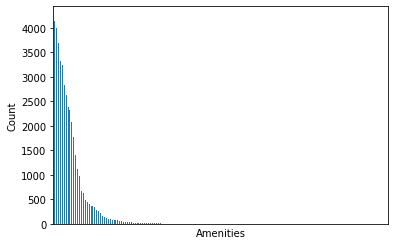

In [188]:
axes =  amenity_series.plot.bar()
# Turn off x-axis, otherwise x tick labels are a mess
axes.set_xticks([])
axes.set_xlabel('Amenities')
axes.set_ylabel('Count');


One way would be to pull out only the most popular amenities.

In [41]:
amenity_series.describe()

count     495.000000
mean      243.573737
std       760.174209
min         1.000000
25%         1.000000
50%         1.000000
75%        18.500000
max      4226.000000
dtype: float64

In [191]:
amenity_series.index[amenity_series >= 20].size

123

In [192]:
amenity_series.index[amenity_series >= 1000].size

38

An arbitrary threshold of having at least a count of 1000 might be reasonable

In [193]:
amenities_to_keep = amenity_series.index[amenity_series >= 1000]
# Make an zeros df
amenities_df = pd.DataFrame(np.zeros([listings_room.shape[0], amenities_to_keep.size]), columns=amenities_to_keep)

# Fill in the df by for loop, 1/0, basically dummy columns.
# Seems pretty slow.
for i, item in enumerate(listings_room['amenities']):
    amenities = json.loads(item)
    for amenity in amenities:
        amenities_df.iloc[i,:].loc[amenity] = 1

In [194]:
# Checking to see if correctly populated, by comparing to next cell
amenities_df.head()

Wifi  Heating  Smoke alarm  Essentials  Kitchen  Long term stays allowed  \
0   1.0      1.0          1.0         0.0      1.0                      1.0   
1   1.0      1.0          1.0         1.0      1.0                      1.0   
2   1.0      0.0          1.0         1.0      1.0                      1.0   
3   1.0      1.0          1.0         1.0      1.0                      1.0   
4   1.0      0.0          1.0         1.0      1.0                      1.0   

   Hangers  Washer  Dryer  Hair dryer  Hot water  Iron  Shampoo  \
0      1.0     1.0    1.0         1.0        1.0   1.0      0.0   
1      1.0     1.0    1.0         1.0        1.0   1.0      1.0   
2      1.0     0.0    1.0         1.0        1.0   1.0      1.0   
3      1.0     1.0    1.0         1.0        1.0   1.0      1.0   
4      1.0     1.0    1.0         1.0        1.0   1.0      1.0   

   Dedicated workspace   TV  Carbon monoxide alarm  Dishes and silverware  \
0                  1.0  0.0                    1.0                    1.0   
1                  1.0  0.0                    1.0                    1.0   
2                  0.0  0.0                    1.0                    1.0   
3                  1.0  1.0                    0.0                    1.0   
4                  1.0  0.0                    1.0                    1.0   

   Fire extinguisher  Refrigerator  Cooking basics  Microwave  Coffee maker  \
0                0.0           1.0             1.0        1.0           1.0   
1                0.0           1.0             1.0        1.0           1.0   
2                1.0           1.0             1.0        1.0           1.0   
3                1.0           1.0             1.0        1.0           1.0   
4                1.0           1.0             1.0        1.0           1.0   

   Stove  Oven  Free parking on premises  Private entrance  Bed linens  \
0    1.0   0.0                       1.0               0.0         1.0   
1    1.0   1.0                       0.0               0.0         1.0   
2    1.0   1.0                       1.0               1.0         1.0   
3    1.0   1.0                       0.0               0.0         0.0   
4    1.0   1.0                       1.0               1.0         1.0   

   Free street parking  Dishwasher  First aid kit  Patio or balcony  \
0                  0.0         1.0            0.0               0.0   
1                  0.0         1.0            0.0               0.0   
2                  1.0         1.0            0.0               1.0   
3                  1.0         1.0            0.0               0.0   
4                  1.0         0.0            0.0               1.0   

   Extra pillows and blankets  Elevator  Cable TV  Luggage dropoff allowed  \
0                         0.0       1.0       1.0                      0.0   
1                         1.0       1.0       1.0                      0.0   
2                         0.0       0.0       1.0                      1.0   
3                         0.0       0.0       0.0                      0.0   
4                         1.0       0.0       0.0                      1.0   

   Air conditioning  Backyard  Gym  
0               1.0       0.0  1.0  
1               1.0       0.0  1.0  
2               0.0       0.0  1.0  
3               0.0       0.0  0.0  
4               0.0       0.0  0.0

In [196]:
listings_room.iloc[0,:]['amenities']

'["Iron", "Dryer", "Bed linens", "Cooking basics", "Elevator", "Hot water", "Indoor fireplace", "Dishes and silverware", "Stove", "Microwave", "Long term stays allowed", "TV with standard cable", "Refrigerator", "Hangers", "Pool", "Air conditioning", "Hair dryer", "Cable TV", "Gym", "Washer", "Wifi", "Carbon monoxide alarm", "Dedicated workspace", "Free parking on premises", "Smoke alarm", "Heating", "Kitchen", "Coffee maker", "Dishwasher", "Host greets you"]'

Next, I'll extract numeric values from the bathroom text.

In [63]:
listings_room['bathrooms_text'].value_counts()

1 bath               2442
2 baths               610
1 shared bath         409
1 private bath        290
1.5 baths             185
2.5 baths             102
2 shared baths         62
3 baths                51
1.5 shared baths       44
3.5 baths              29
4 baths                17
3 shared baths          9
0 shared baths          9
0 baths                 8
6 baths                 5
4 shared baths          5
Shared half-bath        4
5 baths                 4
4.5 baths               3
7 baths                 2
Private half-bath       2
5.5 baths               2
3.5 shared baths        1
Half-bath               1
6.5 baths               1
Name: bathrooms_text, dtype: int64

All the values have a numeric value in the front, unless they are half-baths. I'll code half-baths as 0.5 bathrooms. I'll ignore the "shared" or "private" status, as it does not seem to be totally correlated with the type of property. 

In [83]:
def convert_bathrooms(txt):
    """
    Convert bathrooms
    
    based on data, use easy way
    
    cuz I know all the other ones are half-baths.
    """
    if pd.isna(txt):
        return np.nan
    elif txt[0].isnumeric():
        return float(txt.split(" ")[0])
    else:
        return 0.5  

In [85]:
listings_room['bathrooms_text'].apply(convert_bathrooms).value_counts()

1.0    3141
2.0     672
1.5     229
2.5     102
3.0      60
3.5      30
4.0      22
0.0      17
0.5       7
6.0       5
5.0       4
4.5       3
5.5       2
7.0       2
6.5       1
Name: bathrooms_text, dtype: int64

In [86]:
col_apply_inplace(listings_room, ['bathrooms_text'], convert_bathrooms)

In [90]:
listings_room.head()

room_type  accommodates  bathrooms_text  bedrooms  beds  \
0  Entire home/apt             5             2.0       2.0   2.0   
1  Entire home/apt             2             1.0       1.0   1.0   
2  Entire home/apt             2             1.0       1.0   1.0   
3  Entire home/apt             4             1.0       1.0   2.0   
4  Entire home/apt             4             1.0       2.0   3.0   

                                           amenities  instant_bookable  
0  ["Iron", "Dryer", "Bed linens", "Cooking basic...                 0  
1  ["Iron", "Dryer", "Bed linens", "Cooking basic...                 0  
2  ["Iron", "Outdoor dining area", "Ethernet conn...                 0  
3  ["Iron", "Dryer", "Cooking basics", "Hot water...                 1  
4  ["Iron", "Dryer", "Bed linens", "Cooking basic...                 1

In [49]:
listings_room.head()

property_type        room_type  accommodates  bathrooms  \
0  Entire condominium  Entire home/apt             5        NaN   
1  Entire condominium  Entire home/apt             2        NaN   
2    Entire apartment  Entire home/apt             2        NaN   
3        Entire house  Entire home/apt             4        NaN   
4  Entire guest suite  Entire home/apt             4        NaN   

  bathrooms_text  bedrooms  beds  \
0        2 baths       2.0   2.0   
1         1 bath       1.0   1.0   
2         1 bath       1.0   1.0   
3         1 bath       1.0   2.0   
4         1 bath       2.0   3.0   

                                           amenities instant_bookable  
0  ["Iron", "Dryer", "Bed linens", "Cooking basic...                f  
1  ["Iron", "Dryer", "Bed linens", "Cooking basic...                f  
2  ["Iron", "Outdoor dining area", "Ethernet conn...                f  
3  ["Iron", "Dryer", "Cooking basics", "Hot water...                t  
4  ["Iron", "Dryer", "Bed linens", "Cooking basic...                t

In [51]:
listings_room[['property_type', 'room_type']]

property_type        room_type
0                     Entire condominium  Entire home/apt
1                     Entire condominium  Entire home/apt
2                       Entire apartment  Entire home/apt
3                           Entire house  Entire home/apt
4                     Entire guest suite  Entire home/apt
5                           Entire house  Entire home/apt
6                           Entire house  Entire home/apt
7                       Entire apartment  Entire home/apt
8            Private room in condominium     Private room
9                  Private room in house     Private room
10                      Entire apartment  Entire home/apt
11                 Private room in house     Private room
12                      Entire apartment  Entire home/apt
13                    Entire guest suite  Entire home/apt
14                 Private room in house     Private room
15                          Entire house  Entire home/apt
16                 Private room in house     Private room
17                      Entire apartment  Entire home/apt
18                    Entire condominium  Entire home/apt
19                      Entire apartment  Entire home/apt
20                      Entire apartment  Entire home/apt
21                    Entire condominium  Entire home/apt
22                 Private room in house     Private room
23                    Entire condominium  Entire home/apt
24                    Entire condominium  Entire home/apt
25                    Entire condominium  Entire home/apt
26                    Entire condominium  Entire home/apt
27                          Entire house  Entire home/apt
28                    Entire condominium  Entire home/apt
29                      Entire apartment  Entire home/apt
30                    Entire guest suite  Entire home/apt
31                      Entire apartment  Entire home/apt
32                      Entire apartment  Entire home/apt
33                    Entire guest suite  Entire home/apt
34                 Private room in house     Private room
35                 Private room in house     Private room
36                 Private room in house     Private room
37                           Entire loft  Entire home/apt
38                          Entire house  Entire home/apt
39                    Entire condominium  Entire home/apt
40                    Entire guest suite  Entire home/apt
41                    Entire guest suite  Entire home/apt
42                      Entire apartment  Entire home/apt
43                      Entire apartment  Entire home/apt
44                          Entire house  Entire home/apt
45                           Entire loft  Entire home/apt
46                          Entire house  Entire home/apt
47                      Entire apartment  Entire home/apt
48                      Entire apartment  Entire home/apt
49                      Entire apartment  Entire home/apt
50             Private room in apartment     Private room
51                          Entire house  Entire home/apt
52                    Entire condominium  Entire home/apt
53                      Entire apartment  Entire home/apt
54             Private room in apartment     Private room
55           Private room in condominium     Private room
56                 Private room in house     Private room
57                           Entire loft  Entire home/apt
58                      Entire apartment  Entire home/apt
59                    Entire condominium  Entire home/apt
60                 Private room in house     Private room
61                 Private room in house     Private room
62                           Entire loft  Entire home/apt
63                          Entire place  Entire home/apt
64                      Entire apartment  Entire home/apt
65                          Entire house  Entire home/apt
66             Entire serviced apartment  Entire home/apt
67                    Entire guest suite  Entire home/apt
68                       

In [58]:
listings_room = listings_room.drop(labels=['property_type'], axis=1)

In [59]:
listings_room = listings_room.drop(labels=['bathrooms'], axis=1)

In [61]:
col_apply_inplace(listings_room, 
                  ['instant_bookable'], 
                  convert_tf_to_float)

In [108]:
listings_room = listings_room.drop(labels=['amenities'], axis=1)

In [99]:
amenities_df.columns = amenities_df.columns.str.lower()

In [101]:
amenities_df.columns = 'amenity_' + amenities_df.columns

In [106]:
listings_room = pd.concat([listings_room, amenities_df], axis=1)

In [109]:
listings_room.head()

room_type  accommodates  bathrooms_text  bedrooms  beds  \
0  Entire home/apt             5             2.0       2.0   2.0   
1  Entire home/apt             2             1.0       1.0   1.0   
2  Entire home/apt             2             1.0       1.0   1.0   
3  Entire home/apt             4             1.0       1.0   2.0   
4  Entire home/apt             4             1.0       2.0   3.0   

   instant_bookable  amenity_wifi  amenity_heating  amenity_smoke alarm  \
0                 0           1.0              1.0                  1.0   
1                 0           1.0              1.0                  1.0   
2                 0           1.0              0.0                  1.0   
3                 1           1.0              1.0                  1.0   
4                 1           1.0              0.0                  1.0   

   amenity_essentials  amenity_kitchen  amenity_long term stays allowed  \
0                 0.0              1.0                              1.0   
1                 1.0              1.0                              1.0   
2                 1.0              1.0                              1.0   
3                 1.0              1.0                              1.0   
4                 1.0              1.0                              1.0   

   amenity_hangers  amenity_washer  amenity_dryer  amenity_hair dryer  \
0              1.0             1.0            1.0                 1.0   
1              1.0             1.0            1.0                 1.0   
2              1.0             0.0            1.0                 1.0   
3              1.0             1.0            1.0                 1.0   
4              1.0             1.0            1.0                 1.0   

   amenity_hot water  amenity_iron  amenity_shampoo  \
0                1.0           1.0              0.0   
1                1.0           1.0              1.0   
2                1.0           1.0              1.0   
3                1.0           1.0              1.0   
4                1.0           1.0              1.0   

   amenity_dedicated workspace  amenity_tv  amenity_carbon monoxide alarm  \
0                          1.0         0.0                            1.0   
1                          1.0         0.0                            1.0   
2                          0.0         0.0                            1.0   
3                          1.0         1.0                            0.0   
4                          1.0         0.0                            1.0   

   amenity_dishes and silverware  amenity_fire extinguisher  \
0                            1.0                        0.0   
1                            1.0                        0.0   
2                            1.0                        1.0   
3                            1.0                        1.0   
4                            1.0                        1.0   

   amenity_refrigerator  amenity_cooking basics  amenity_microwave  \
0                   1.0                     1.0                1.0   
1                   1.0                     1.0                1.0   
2                   1.0                     1.0                1.0   
3                   1.0                     1.0                1.0   
4                   1.0                     1.0                1.0   

   amenity_coffee maker  amenity_stove  amenity_oven  \
0                   1.0            1.0           0.0   
1                   1.0            1.0           1.0   
2                   1.0            1.0           1.0   
3                   1.0            1.0           1.0   
4                   1.0            1.0           1.0   

   amenity_free parking on premises  amenity_private entrance  \
0                               1.0                       0.0   
1                               0.0                       0.0   
2                               1.0                       1.0   
3                               0.0                       0.0   
4  

# Listings Review

In [110]:
listings_review.head()

number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                 16                      0                       0   
1                430                      3                       0   
2                 88                      4                       0   
3                 33                      0                       0   
4                  5                      0                       0   

  first_review  review_scores_rating  review_scores_accuracy  \
0   2011-11-15                  93.0                     9.0   
1   2010-06-22                  93.0                     9.0   
2   2011-06-02                  98.0                    10.0   
3   2010-10-03                  95.0                    10.0   
4   2018-08-04                  96.0                    10.0   

   review_scores_cleanliness  review_scores_checkin  \
0                        9.0                   10.0   
1                       10.0                    9.0   
2                       10.0                   10.0   
3                        9.0                   10.0   
4                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  
0                          9.0                    10.0                  9.0  
1                         10.0                    10.0                  9.0  
2                         10.0                    10.0                 10.0  
3                          9.0                    10.0                  9.0  
4                         10.0                    10.0                  9.0

In [111]:
listings_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            4299 non-null   int64  
 1   number_of_reviews_ltm        4299 non-null   int64  
 2   number_of_reviews_l30d       4299 non-null   int64  
 3   first_review                 3499 non-null   object 
 4   review_scores_rating         3474 non-null   float64
 5   review_scores_accuracy       3462 non-null   float64
 6   review_scores_cleanliness    3462 non-null   float64
 7   review_scores_checkin        3461 non-null   float64
 8   review_scores_communication  3463 non-null   float64
 9   review_scores_location       3462 non-null   float64
 10  review_scores_value          3462 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 369.6+ KB


In [112]:
listings_review.isna().sum()

number_of_reviews                0
number_of_reviews_ltm            0
number_of_reviews_l30d           0
first_review                   800
review_scores_rating           825
review_scores_accuracy         837
review_scores_cleanliness      837
review_scores_checkin          838
review_scores_communication    836
review_scores_location         837
review_scores_value            837
dtype: int64

In [114]:
listings_review['number_of_reviews'].value_counts()

0      800
1      337
2      227
3      168
4      145
5      123
6      115
7       88
9       87
8       83
11      59
10      53
16      50
12      49
18      49
14      48
13      46
22      43
21      41
15      37
17      35
19      34
26      33
35      33
20      32
23      31
24      30
25      30
29      27
47      26
33      26
52      26
36      26
37      26
31      25
30      25
27      23
28      23
39      21
51      21
41      20
44      20
50      19
34      19
53      18
43      18
60      18
32      18
64      17
74      17
40      17
48      17
38      17
45      17
69      15
49      15
57      15
73      14
61      14
46      14
80      13
76      13
59      13
84      12
91      12
62      12
72      12
66      11
68      11
86      11
92      11
42      10
75      10
58      10
56      10
121     10
67      10
111      9
101      9
97       9
55       9
71       9
63       9
78       9
90       9
83       9
82       8
116      8
95       8
54       8
96       8

In [115]:
listings_review.query('review_scores_rating != review_scores_rating')

number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
24                    0                      0                       0   
48                    0                      0                       0   
86                    0                      0                       0   
108                   0                      0                       0   
113                   1                      0                       0   
147                   0                      0                       0   
157                   1                      0                       0   
209                   0                      0                       0   
219                   0                      0                       0   
228                   0                      0                       0   
236                   0                      0                       0   
243                   0                      0                       0   
251                   0                      0                       0   
268                   0                      0                       0   
281                   0                      0                       0   
294                   0                      0                       0   
301                   0                      0                       0   
317                   0                      0                       0   
388                   0                      0                       0   
425                   0                      0                       0   
429                   2                      0                       0   
474                   0                      0                       0   
501                   0                      0                       0   
511                   0                      0                       0   
543                   0                      0                       0   
567                   0                      0                       0   
568                   0                      0                       0   
607                   1                      0                       0   
644                   0                      0                       0   
665                   0                      0                       0   
678                   0                      0                       0   
680                   0                      0                       0   
791                   0                      0                       0   
845                   1                      0                       0   
859                   0                      0                       0   
873                   0                      0                       0   
924                   0                      0                       0   
928                   0                      0                       0   
949                   1                      0                       0   
957                   0                      0                       0   
974                   0                      0                       0   
1093                  0                      0                       0   
1119                  0                      0                       0   
1132                  2                      0                       0   
1146                  0                      0                       0   
1205                  0                      0                       0   
1214                  1                      0                       0   
1266                  0                      0                       0   
1284                  0                      0                       0   
1294                  0                      0                       0   
1302                  0                      0                       0   
1314                  0                      0                       0   
1325                  0                      0                       0   
1327      

In [116]:
col_apply_inplace(listings_review, ['first_review'], pd.to_datetime, format='%Y-%m-%d')

<ipython-input-29-b18b413ca866>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(f, **kwds)


In [118]:
listings_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   number_of_reviews            4299 non-null   int64         
 1   number_of_reviews_ltm        4299 non-null   int64         
 2   number_of_reviews_l30d       4299 non-null   int64         
 3   first_review                 3499 non-null   datetime64[ns]
 4   review_scores_rating         3474 non-null   float64       
 5   review_scores_accuracy       3462 non-null   float64       
 6   review_scores_cleanliness    3462 non-null   float64       
 7   review_scores_checkin        3461 non-null   float64       
 8   review_scores_communication  3463 non-null   float64       
 9   review_scores_location       3462 non-null   float64       
 10  review_scores_value          3462 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(3)


## PUTTING IT BACK TOGETHER

In [128]:
df_clean = pd.concat([listings_summary, listings_host_clean, listings_room, listings_review], axis=1)

In [129]:
df_clean.head()

id                                               name  host_id  \
0  10080                     D1 -  Million Dollar View 2 BR    30899   
1  13358  Monthly (or Longer ) Designer One Bedroom Down...    52116   
2  13490                       Vancouver's best kept secret    52467   
3  14267                                  EcoLoft Vancouver    56030   
4  16254        Close to PNE/Hastings Park and East Village    63238   

        host_name             neighbourhood  latitude  longitude  \
0            Rami                  Downtown  49.28872 -123.12046   
1            Lynn                  West End  49.28201 -123.12669   
2            Iris  Kensington-Cedar Cottage  49.25622 -123.06607   
3  Peter & Alison  Kensington-Cedar Cottage  49.24922 -123.08139   
4           Jason          Hastings-Sunrise  49.27721 -123.04086   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    150              90                 16  2017-02-26   
1  Entire home/apt     85              30                430  2021-01-01   
2  Entire home/apt    145              30                 88  2020-10-31   
3  Entire home/apt    140               3                 33  2020-02-07   
4  Entire home/apt    195               3                  5  2019-08-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.14                              40               346   
1               3.27                               1                98   
2               0.73                               1               203   
3               0.26                               1               123   
4               0.15                               1               289   

  host_since  host_response_time  host_response_rate  host_acceptance_rate  \
0 2009-08-10      within an hour                0.93                  0.87   
1 2009-11-07        within a day                1.00                  0.57   
2 2009-11-08      within an hour                1.00                  0.78   
3 2009-11-20  within a few hours                1.00                   NaN   
4 2009-12-15                 NaN                 NaN                   NaN   

   host_is_superhost  host_has_profile_pic  host_identity_verified  \
0                0.0                   1.0                     1.0   
1                1.0                   0.0                     1.0   
2                1.0                   1.0                     1.0   
3                0.0                   1.0                     1.0   
4                0.0                   1.0                     1.0   

         room_type  accommodates  bathrooms_text  bedrooms  beds  \
0  Entire home/apt             5             2.0       2.0   2.0   
1  Entire home/apt             2             1.0       1.0   1.0   
2  Entire home/apt             2             1.0       1.0   1.0   
3  Entire home/apt             4             1.0       1.0   2.0   
4  Entire home/apt             4             1.0       2.0   3.0   

   instant_bookable  amenity_wifi  amenity_heating  amenity_smoke alarm  \
0                 0           1.0              1.0                  1.0   
1                 0           1.0              1.0                  1.0   
2                 0           1.0              0.0                  1.0   
3                 1           1.0              1.0                  1.0   
4                 1           1.0              0.0                  1.0   

   amenity_essentials  amenity_kitchen  amenity_long term stays allowed  \
0                 0.0              1.0                              1.0   
1                 1.0              1.0                              1.0   
2                 1.0              1.0                              1.0   
3                 1.0              1.0                              1.0   
4                 1.0              1.0                              1.0   

   amenity_hangers  amenity_washer  amenity_dryer  amenity_ha

In [130]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 77 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  4299 non-null   int64         
 1   name                                4299 non-null   object        
 2   host_id                             4299 non-null   int64         
 3   host_name                           4170 non-null   object        
 4   neighbourhood                       4299 non-null   object        
 5   latitude                            4299 non-null   float64       
 6   longitude                           4299 non-null   float64       
 7   room_type                           4299 non-null   object        
 8   price                               4299 non-null   int64         
 9   minimum_nights                      4299 non-null   int64         
 10  number_of_reviews       

CHECK FOR DUPLICATES

# Exploratory Data Analysis
WHAT is price? Probably not including custom pricing for nights/weeks/months, and not smart pricing (surge pricing). Not sure if cleaning/service fees are amalgamated. Probably just nightly, not sure how dates are adjusted. Rough estimator.